In [163]:
import tensorflow as tf
import cv2
import os
import sys
import matplotlib.pyplot as plt
import numpy as np   #pip install numpy


In [117]:
img_array=cv2.imread(r"\Users\DELL\Desktop\equinox\closed eyes\s0001_00011_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

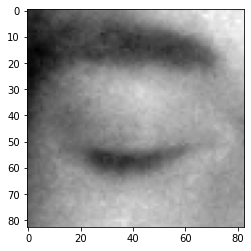

In [118]:
plt.imshow(img_array,cmap="gray")

In [119]:
img_array.shape


(83, 83)

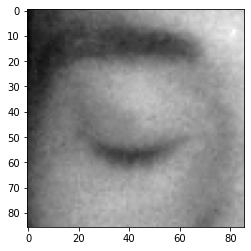

In [120]:
datadirectory = r"\Users\DELL\Desktop\equinox"
classes = ["closed eyes", "open eyes"]
for category in classes:
    path=os.path.join(datadirectory, category)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break
    
    

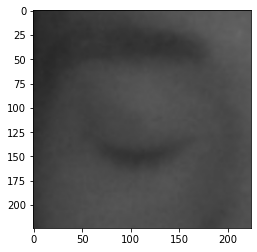

In [121]:
img_size=224
new_array=cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [122]:
training_data =[]

def create_training_data():
    for category in classes:
        path=os.path.join(datadirectory, category)
        class_num= classes.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb, (img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [123]:
create_training_data()

In [124]:
print(len(training_data))

1809


In [125]:
import random

random.shuffle(training_data)

In [126]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)
    
    
x = np.array(x).reshape(-1, img_size, img_size, 3 )

In [127]:
x.shape

(1809, 224, 224, 3)

In [128]:
x= x/255.0

In [129]:
Y=np.array(y)

In [130]:
import pickle
pickle_out= open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()




In [131]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [132]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [133]:
model= tf.keras.applications.mobilenet.MobileNet()


In [134]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

_________________________________________________________________
conv_dw_13 (DepthwiseConv2D) (None, 7, 7, 1024)        9216      
_________________________________________________________________
conv_dw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_dw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
conv_pw_13 (Conv2D)          (None, 7, 7, 1024)        1048576   
_________________________________________________________________
conv_pw_13_bn (BatchNormaliz (None, 7, 7, 1024)        4096      
_________________________________________________________________
conv_pw_13_relu (ReLU)       (None, 7, 7, 1024)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
reshape_1 

In [135]:
#Transfer learning

In [136]:
base_input= model.layers[0].input

In [137]:
base_output = model.layers[-4].output

In [138]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output= layers.Activation('sigmoid')(final_output)

In [139]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [140]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [141]:
#settings for binary classification

In [142]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [143]:
new_model.fit(x,Y, epochs = 1,validation_split=0.1)

51/51 [==============================] - 1334s 25s/step - loss: 0.2262 - accuracy: 0.9249 - val_loss: 1.4977 - val_accuracy: 0.7735


In [153]:
new_model.save('my_model.h5')

In [157]:
new_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
#checking the network for prediction 

In [168]:
img_array = cv2.imread(r'\Users\DELL\Desktop\equinox\closed eyes\s0001_00017_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array =cv2.resize(backtorgb, (img_size,img_size))


In [169]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [170]:
x_input.shape

(1, 224, 224, 3)

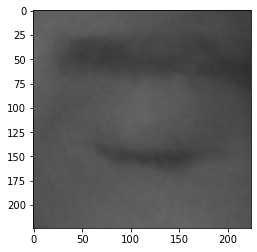

In [172]:
plt.imshow(new_array)

In [173]:
x_input=x_input/255.0

In [174]:
prediction = new_model.predict(x_input)

In [175]:
#lets check on unknown images

In [176]:
prediction

array([[2.2601256e-07]], dtype=float32)

In [292]:
img = cv2.imread(r'\Users\DELL\Desktop\pics\image1.jpg')

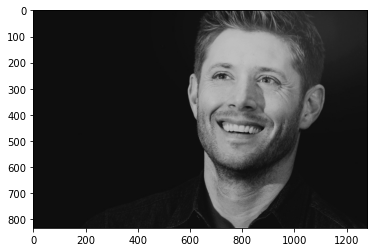

In [293]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [294]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [295]:
eye_Cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [296]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [297]:
eyes=eye_Cascade.detectMultiScale(gray,1.1,4)

In [298]:
for(x, y, w, h) in eyes[:]:
    cv2.rectangle(img, (x,y),(x+w, y+h), (0,255,0),2)
print(eyes)

[[678 210  86  86]
 [850 229  78  78]
 [800 406  86  86]]


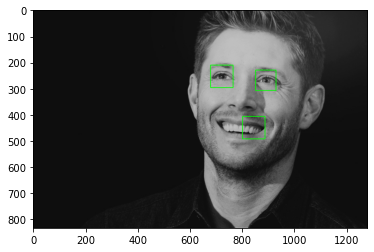

In [299]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
eye_Cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes=eye_Cascade.detectMultiScale(gray,1.1,4)
for(x, y, w, h) in eyes:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=img[y:y+h, x:x+w]
    eyess=eye_Cascade.detectMultiScale(roi_gray)
    if len(eyes) == 0:
            print("eyes are not detected")
    else:
        for(ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey + eh, ex: ex + ew]
    
    


In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

In [ ]:
final_image=cv2.resize(eyes_roi,(224, 224))
final_image=np.expand_dims(final_image,axis=0)
final_image=finale_image/225.0

In [ ]:
final_image.shape

In [ ]:
new_model.predict(final_image)

In [ ]:
import cv2 

path  = "haarcascade frontalface_default.xml" 
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly

if not cap.isOpened(): 
    cap = cv2.VideoCapture(1)
if not cap.isOpened(): 
    raise I0Error("Cannot open webcam")


while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    eyes = eye_Cascade.detectMultiScale(gray, 1.1, 4)

    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2) 
        eyess = eye_Cascade.detectMultiScale(roi_gray) 
        if len(eyes) == 0:
            print("Eyes not detected")
        else:
            for (ex,ey,ew,eh) in eyess: 
                eyes_roi = roi_color[ey: ey + eh, ex:ex + ew]
                
        final_image=cv2.resize(eyes_roi,(224, 224))
        final_image=np.expand_dims(final_image,axis=0)
        final_image=finale_image/225.0



    Predictions = new_model.predict(final_image) 
    if (Predictions > 0):
        status = "Open_Eyes"
    else:
        status = "Closed Eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    # To draw a rectangle around features
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX

    # Using putText() methhod for inserting text in video
    
    cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow("Drowsiness Detected", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
